<a href="https://colab.research.google.com/github/2065635josue-byte/2025_Repositorio_IntArtyRedNeu/blob/main/Actividades/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AF8: Redes Neuronales Convolucionales

Autores:


*   Josué Isaac López Salazar 2065635 IMTC N4-N6
*   Humberto Alejandro Carreón Corpus 2042901 IMTC N4-N6
*   Francisco Gutiérrez Zúñiga 1910331 IMTC N4-N6
*   Johann Jonás Andrade Esteban 2109318 IMTC N4-N6






# Paso 1: Cargar Librerías

Importación de librerías

In [84]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Paso 2: Cargar conjunto de datos

Cargar del conjunto de datos mnist

In [85]:
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

Obtención de datos de entrenamiento y de prueba

In [86]:
(x_train, y_train), (x_test, y_test) = mnist_data

Dimension o forma de las imagenes de entrenamiento (x_train).

In [87]:
x_train.shape

(60000, 28, 28)

Dimension o forma de las imagenes de prueba (x_test).

In [88]:
x_test.shape

(10000, 28, 28)

# Paso 3: Preprocesamiento de datos

Normalización de los datos de entrenamiento y de prueba

In [89]:
x_train = x_train / 255
x_test = x_test / 255

Imagen de las primeras 25 imágenes del conjunto de entrenamiento (x_train) con el nombre de la clase o etiqueta debajo de cada imagen (y_train).

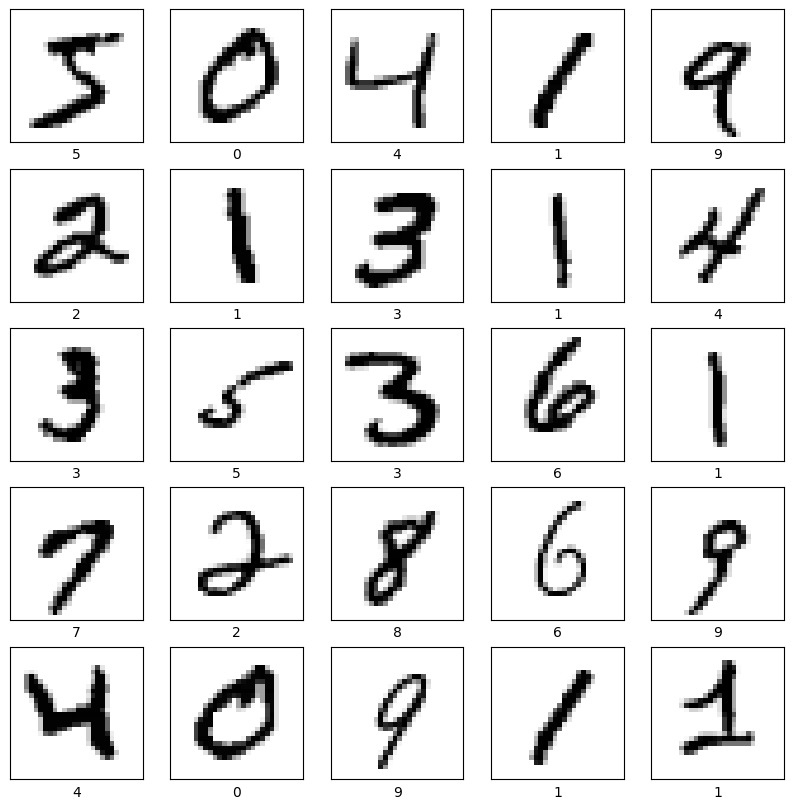

In [90]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Paso 4 Seleccion y entrenamiento del modelo

Desarrollo de la base convolucional

In [91]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Visualización de la arquitectura del modelo que estamos desarrollando.

In [92]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 64)       │        16,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,864 (97.12 KB)

 Trainable params: 24,864 (97.12 KB)

 Non-trainable params: 0 (0.00 B)

Generación de las campas densas para el procesamiento de la información y obtención de los datos de salida.

In [93]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

Visualización completa de la arquitectura del modelo desarrollado

In [94]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,082 (902.66 KB)

 Trainable params: 231,082 (902.66 KB)

 Non-trainable params: 0 (0.00 B)

Compilación del modelo y selección del optimizador "adam". La métrica a utilizar será "accuracy" (exactitud). Cargar e inicio del entenamiento del modelo por medio de la función "fit".

In [95]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3,
                    validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9017 - loss: 0.3207 - val_accuracy: 0.9865 - val_loss: 0.0413
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9861 - loss: 0.0461 - val_accuracy: 0.9878 - val_loss: 0.0401
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9912 - loss: 0.0295 - val_accuracy: 0.9906 - val_loss: 0.0288


# Paso 5: Prueba del modelo

Visualización de la exactitud del modelo con los datos de entrenamiento y de prueba

313/313 - 3s - 8ms/step - accuracy: 0.9906 - loss: 0.0288


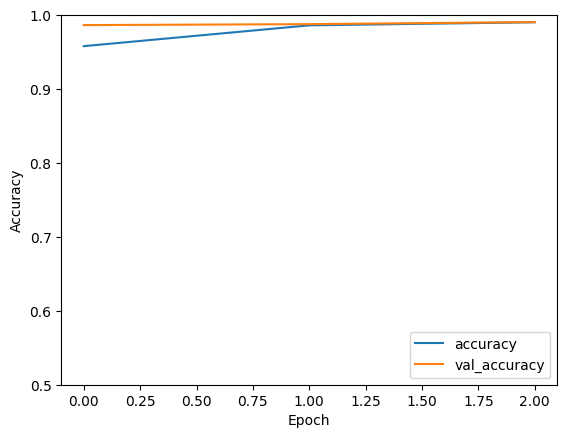

In [96]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Generación de un modelo de probabilidad.

In [97]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

Generación de predicciones para el conjunto de datos de entrenamiento. Se realiza una prediccion de cada imagen del conjunto de prueba.

In [98]:
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


Prediccion de la primera imagen del conjunto de prueba

In [99]:
predictions[0]

array([1.7410288e-08, 6.4396579e-07, 8.6189232e-07, 1.8848381e-06,
       1.6183476e-08, 6.4074959e-07, 4.6082008e-13, 9.9999303e-01,
       1.3625730e-07, 2.5921222e-06], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la primera imagen:

In [100]:
print(np.argmax(predictions[0]))

7


Prediccion de la segunda imagen del conjunto de prueba

In [101]:
predictions[1]

array([4.1145789e-08, 6.3800610e-07, 9.9999934e-01, 5.1525978e-11,
       1.3051493e-10, 2.2396992e-13, 2.8958846e-08, 5.1289476e-11,
       1.7794180e-10, 1.1143147e-11], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la segunda imagen:

In [102]:
print(np.argmax(predictions[1]))

2


Prediccion de la tercera imagen del conjunto de prueba

In [103]:
predictions[2]

array([3.2071555e-05, 9.9781156e-01, 9.9823221e-05, 2.3892030e-06,
       1.2205939e-03, 2.7535012e-04, 1.7375275e-04, 3.0164848e-04,
       5.5952827e-05, 2.6802665e-05], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la tercera imagen:

In [104]:
print(np.argmax(predictions[2]))

1


Prediccion de la cuarta imagen del conjunto de prueba

In [105]:
predictions[3]

array([9.9978042e-01, 3.4979323e-08, 6.0762841e-06, 6.6627422e-07,
       5.3329767e-08, 2.9862571e-07, 1.5219307e-04, 1.2059513e-06,
       6.5165082e-06, 5.2516269e-05], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la cuarta imagen:

In [106]:
print(np.argmax(predictions[3]))

0


Prediccion de la quinta imagen del conjunto de prueba

In [107]:
predictions[4]

array([2.7582231e-10, 5.6106195e-08, 4.1496481e-08, 9.8688391e-10,
       9.9999672e-01, 8.8117802e-10, 4.2457049e-08, 2.9744780e-09,
       1.3359207e-06, 1.6915957e-06], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la quinta imagen:

In [108]:
print(np.argmax(predictions[4]))

4


Se observa la etiqueta asignada a cada una de las imágenes a la que le hemos hecho la predicción.

In [109]:
print(y_test[0])
print(y_test[1])
print(y_test[2])
print(y_test[3])
print(y_test[4])

7
2
1
0
4


Se genera el código para generar una gráfica y observar las predicciones de varias imágenes.

In [110]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Se trazan las primeras 30 imagenes junto con sus predicciones.

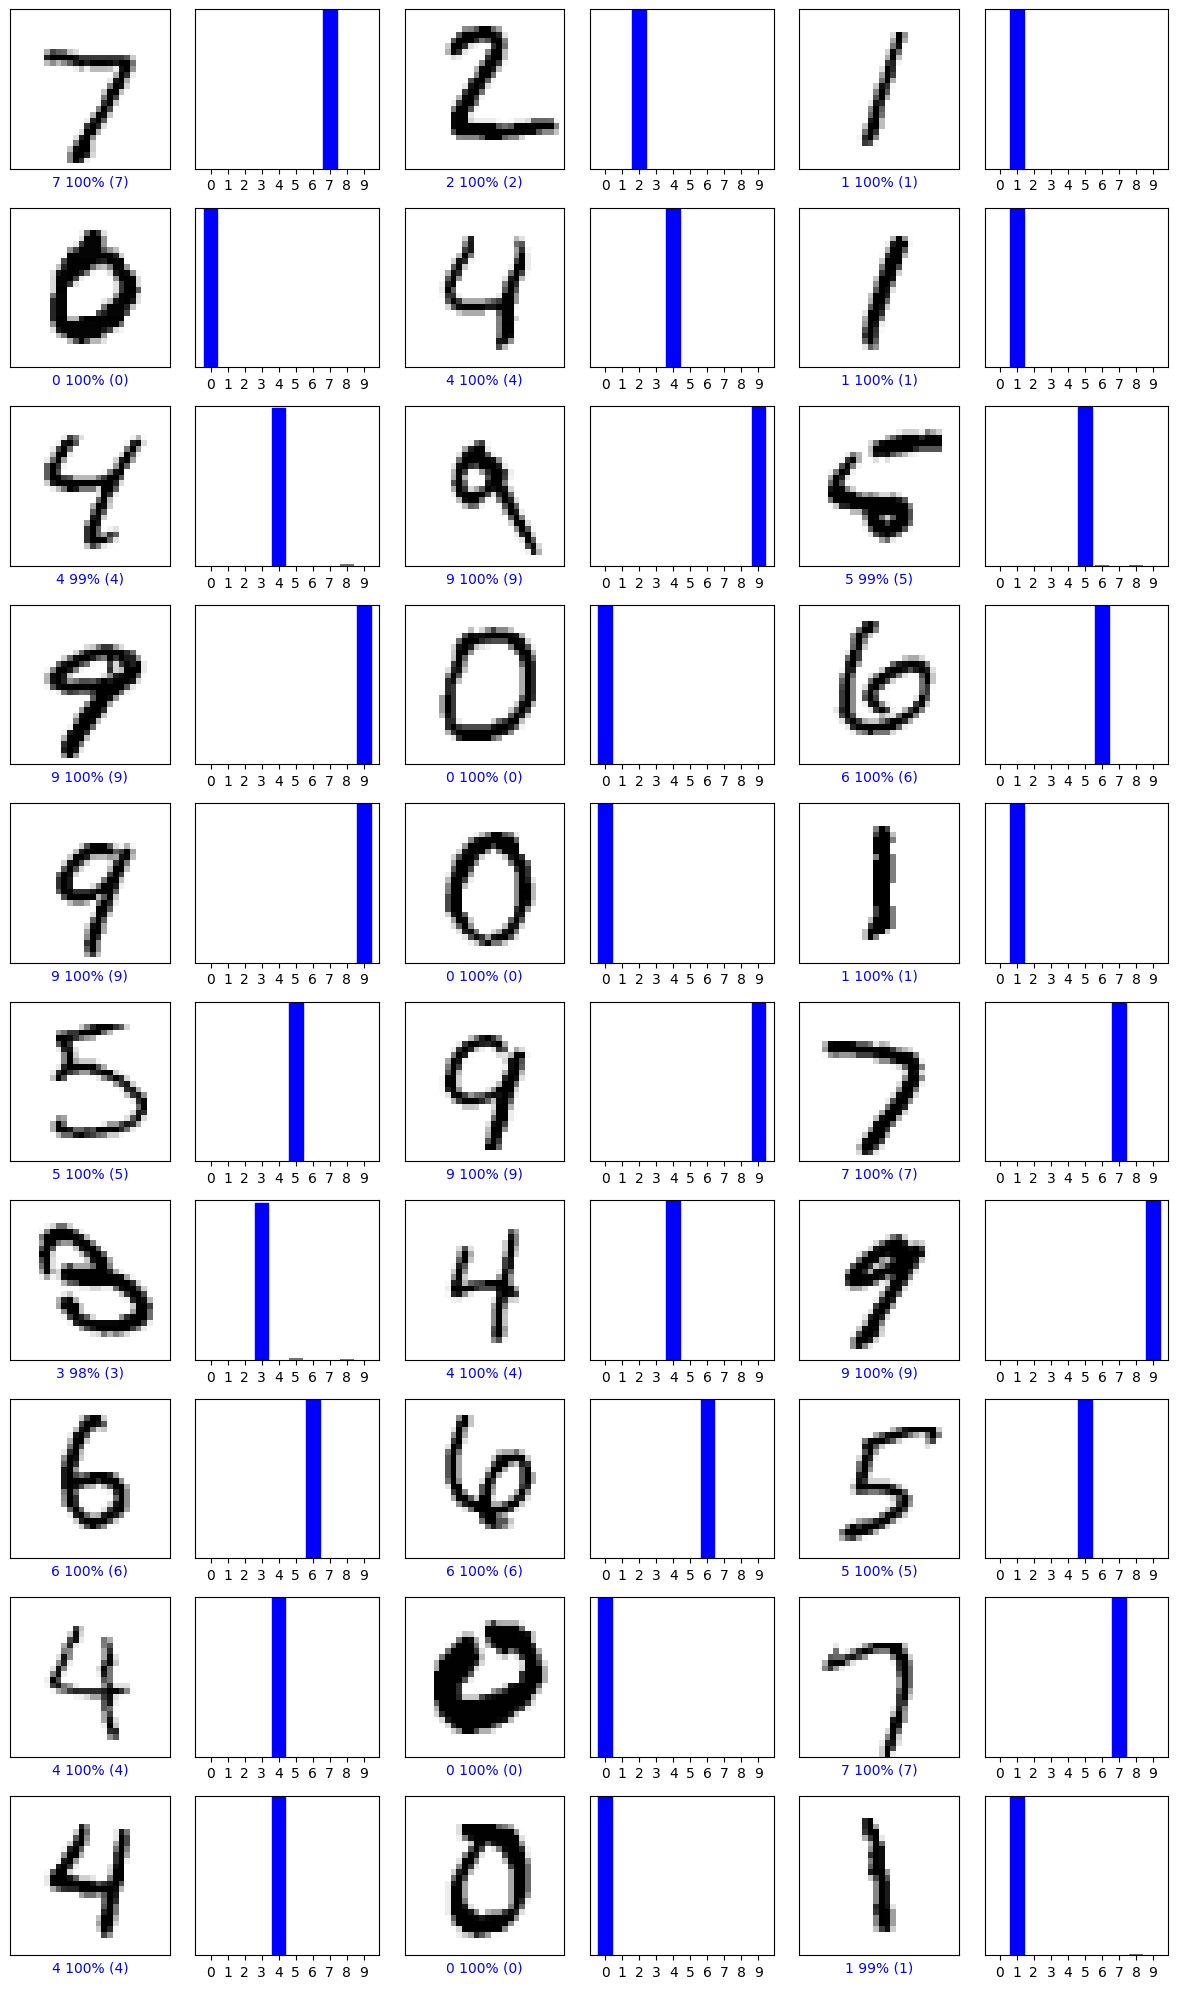

In [111]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()